In [1]:
wav_file = 'JNAS/WAVES_DT/F001/NF001001_DT.wav'

In [2]:
from IPython.display import Audio

In [4]:
Audio(wav_file)

In [12]:
import scipy

In [16]:
sr, frames_sci = scipy.io.wavfile.read(wav_file)

frames_sci

array([-9, -8, -6, ..., 77, 46, 58], dtype=int16)

In [5]:
import librosa

In [48]:
frames, sr = librosa.load(wav_file, 16e3, dtype=float)

In [21]:
import numpy as np

In [49]:
frames[:10]

array([-2.74658203e-04, -2.44140625e-04, -1.83105469e-04, -3.66210938e-04,
       -3.05175781e-04,  3.05175781e-05, -3.05175781e-05, -1.22070312e-04,
        2.13623047e-04,  9.15527344e-05])

In [50]:
frames / frames_sci

/home/houbowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/houbowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([3.05175781e-05, 3.05175781e-05, 3.05175781e-05, ...,
       3.05175781e-05, 3.05175781e-05, 3.05175781e-05])

In [26]:
frames_sci[:10]

array([ -9,  -8,  -6, -12, -10,   1,  -1,  -4,   7,   3], dtype=int16)

#### scipy和librosa的读取的wav文件的frames只是倍数关系

In [54]:
len(frames)

54088

In [56]:
from matplotlib import pyplot as plt

In [57]:
%matplotlib inline

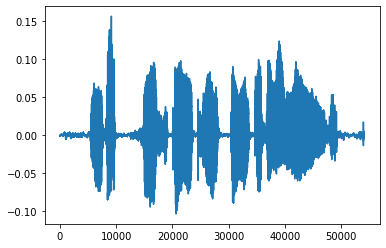

In [58]:
plt.plot(frames)

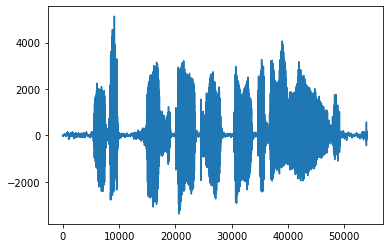

In [59]:
plt.plot(frames_sci)

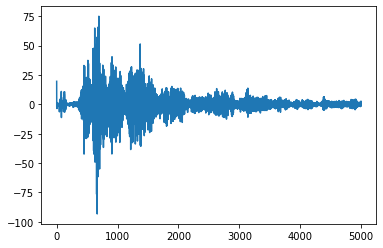

In [66]:
plt.plot(np.fft.fft(frames)[:5000]);

In [71]:
abs(np.fft.fft(frames[:160]))**2/160

array([2.81157554e-06, 9.41417076e-06, 6.03702136e-07, 1.10595428e-06,
       5.32495283e-08, 3.53665582e-07, 3.16894979e-07, 7.40243726e-08,
       1.81032418e-08, 5.01320199e-08, 1.18262531e-07, 7.30745606e-08,
       1.86891533e-07, 3.81867178e-08, 7.03861857e-08, 2.48101766e-08,
       4.69268753e-08, 7.80690708e-09, 6.97089486e-08, 1.60105681e-08,
       1.89408905e-09, 2.68266922e-08, 1.19615307e-08, 2.74976855e-09,
       4.55495363e-08, 1.06921334e-08, 6.21950742e-09, 4.04635665e-09,
       7.65193810e-08, 1.62701324e-09, 1.76133730e-08, 8.73638349e-09,
       1.44111060e-08, 3.86365964e-09, 9.22278071e-09, 2.04312714e-08,
       7.25178870e-09, 2.68863658e-08, 4.11150386e-09, 1.02048015e-08,
       6.17583282e-09, 4.68624062e-08, 3.99036964e-08, 1.27785261e-09,
       6.91427922e-08, 1.64877338e-09, 2.54361176e-08, 1.67965859e-08,
       7.84116810e-08, 4.75905371e-09, 5.15372634e-09, 4.37074526e-08,
       5.43603392e-08, 1.78871085e-08, 1.97123781e-09, 1.69578890e-08,
      

#### TODO: FFT coefficients
1. 在tutorial里面有一个MFCC的coefficients, 里面说有12个, 然后根据变换, 可以从512的nfft变成257.
2. 什么是nfft?

所有的方程都可以变成
\\[f(t) = a_0 + a_1cos(t)+...+b_1sin(t)+b_2sin(t)+...\\]

首先把方程在一个周期\\(0-2\pi\\)求积分


那么对于sin和cos, 一个周期内的积分都是0, 所以只剩下第一个参数\\(a_0\\), 并且\\(a_0\\)求出来是整个周期内的均值.

那么对于sin, 如何求对应的系数b?

对于每一项, 在后面乘以一个\\(sin(nt)\\), 然后求积分\\(\int\\)

#### TODO: \\(\int cos(t)sin(nt)\\)
\begin{array}{l}{\sin (A+B)=\sin A \cos B+\cos A \sin B} \\ {\sin (A-B)=\sin A \cos B-\cos A \sin B}\end{array}